In [ ]:
# Controlling the browser and navigating is much easier in helium
# We can also use combination of both
# I prefer selenium for extracting data since i have developed good grip on it while making this project
# And i prefer helium for controlling the browser


#!pip install helium --upgrade helium --user
#!pip install --upgrade pip --user

In [3]:
from helium import *
from selenium import webdriver
import time
from tqdm import tqdm

In [4]:
import pandas as pd


In [6]:
# Function to extract most popular news topics from playlists 

# Initializing driver

print('Initializing driver....')
driver = start_chrome(maximize=True) # Maximize window

# Channel name and youtube url

channel_name='wion'
url='https://www.youtube.com/c/'+channel_name+'/playlists'
print(url)
print('Fetching URL...')

# Loading URL

go_to(url)
time.sleep(2)
print('URL fetched....')

# Setting page height

h=300
print('Scraping phase-1 started...')

# Creating empty list to store data

output_text=[]

# Scrolling upto specified height

for i in tqdm(range(40)):
    scroll_down(h)
    time.sleep(0.2)
    h+=300

# Phase-1
# Extracting the playlist title, video_link and palylist_link

title=[i.text for i in driver.find_elements_by_id('video-title')]
vdo_link=[i.get_attribute('href') for i in driver.find_elements_by_id('video-title')]
playlist_links=[i.get_attribute('href') for i in driver.find_elements_by_xpath("""//*[@id="view-more"]/a""")]
print('Scraping phase 1 successfully completed...')

# Phase-2

print('Scaping phase-2 started....')

# Using loop to get top news title in each playlist

for i in tqdm(playlist_links):
    go_to(i)
    time.sleep(1.5)
    for j in range(10):
        scroll_down(h)
        time.sleep(0.3)
        h+=300
    time.sleep(2)
    vdo_ttl=[t.text for t in driver.find_elements_by_id('video-title')]
    output_text.append(vdo_ttl)
print('Scraping phase 2 successfully completed....')
print('Scraping done successfully without any error!')

Initializing driver....
https://www.youtube.com/c/wion/playlists
Fetching URL...


  0%|                                                                                           | 0/40 [00:00<?, ?it/s]

URL fetched....
Scraping phase-1 started...


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:11<00:00,  3.53it/s]


Scraping phase 1 successfully completed...


  0%|                                                                                          | 0/292 [00:00<?, ?it/s]

Scaping phase-2 started....


100%|████████████████████████████████████████████████████████████████████████████████| 292/292 [23:43<00:00,  4.87s/it]

Scraping phase 2 successfully completed....
Scraping done successfully without any error!


In [7]:
len(play_title)

292

In [16]:
dummy_text=[]
for i in play_title:
    for j in i:
        if len(j)>2:
            dummy_text.append(j)

In [17]:
len(dummy_text)

12000

In [18]:
dummy_text

['Skateistan: Using skateboards to empower girls in Afghanistan | World News | WION News',
 'Afghanistan: No progress in peace talks, what’s next?',
 'Afghan journalist Rahmatullah Nekzad killed near his home',
 'Indian PM Modi, Afghanistan President Ghani to hold virtual summit| Number of announcements expected',
 'First virtual summit between Indian PM Modi & Afghan Prez Ashraf Ghani in 2021 | South Asia | WION',
 'Shahtoot Dam hallmark of India-Afghanistan friendship: Tahir Qadiry | WION Exclusive Conversation',
 'NATO holds post-Trump talks as Afghan decision looms | Jens Stoltenberg | Latest World News | WION',
 'Afghan Prez Ashraf Ghani sends sacred chadar to Ajmer Sharif | Tahir Qadiry | English News',
 "Afghanistan: Slain journalist's family killed",
 'Three women journalists killed, two wounded in Afghanistan| Latest English News | World News | WION',
 'U.S. Envoy meets Taliban leaders in Doha | International News | WION News',
 'Report: Antony Blinken proposes UN-led meeting 

In [36]:
title

['WION-VOA Co-Production',
 'The Good Life',
 'Monkeypox Outbreak',
 'QUAD Summit 2022',
 'IPL 2022',
 'WION GLOBAL SUMMIT 2022',
 'Lifestyle',
 'Entertainment News',
 'World At War',
 'World News 2022',
 'WION Originals',
 'French Election 2022',
 'WION Climate Summit 2022',
 'Russia Ukraine Conflict',
 'WION In Ukraine',
 'WION EXPLAINER',
 "India's 73rd Republic Day",
 'INDIA BUDGET 2022',
 'International News',
 'Gravitas 2022',
 'Yearender 2021',
 'Taliban',
 'GEN BIPIN RAWAT CHOPPER CRASH',
 'COP26 Summit 2021',
 'G20 Summit 2021',
 'Sudan',
 'Gravitas US Edition',
 'WION-USA Direct',
 'QUAD Summit',
 '76th UNGA session',
 'BRICS Summit',
 'Wion Shorts',
 'Wion Shorts',
 'WION Climate Tracker',
 'KASHMIR- ROAD TO PROGRESS',
 'Tokyo Olympics 2021',
 'NATO Summit 2021',
 'G7 Summit 2021',
 'Israel-Palestine Clashes',
 "Ambassadors' Roundtable",
 'mission sustainability',
 'Ukraine',
 'Netherlands',
 'South Korea',
 'Heart Of Asia Summit 2021',
 "PM Modi's Bangladesh Visit",
 'WION 

In [37]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords

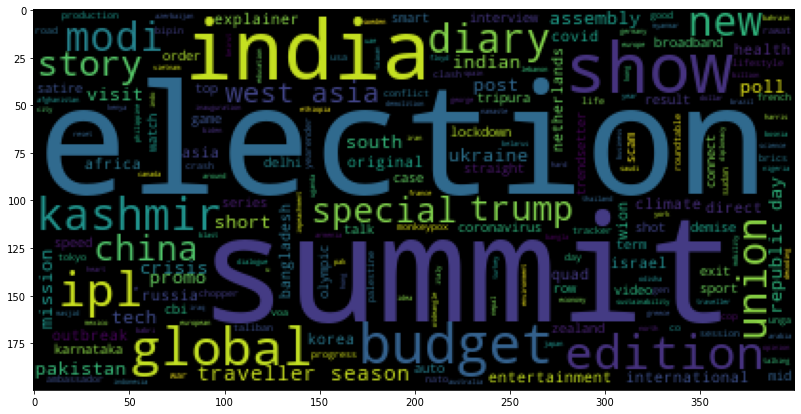

In [38]:
tokenized=[nltk.pos_tag(word_tokenize(i)) for i in title]
raw_text=[]
for i in tokenized:
    for j in i:
        if (j[1]=='NN') or (j[1]=='NNP') or (j[1]=='NNS') or (j[1]=='NNPS') or (j[1]=='JJ'):
            raw_text.append(j[0])

# Lemmatizing

lem=WordNetLemmatizer()

# cleaning the data for analysis

def cleaned_review(text):
    text_no=text.lower()
    text_no=re.sub(r"[^a-zA-Z]",' ',text_no)
    text_no=re.sub(r"\s+"," ",text_no)
    text_no=lem.lemmatize(text_no)
    if len(text_no)>2:
        return text_no 

    
final=[cleaned_review(i) for i in raw_text if cleaned_review(i) is not None]

# Generating Wordcloud

plt.figure(figsize=(15,7))
a1=WordCloud().generate(' '.join(i for i in final if i.lower() not in ('gravitas','news','exclusive','english','wion','latest','live','reports','world','palki','sharma')))
plt.imshow(a1);

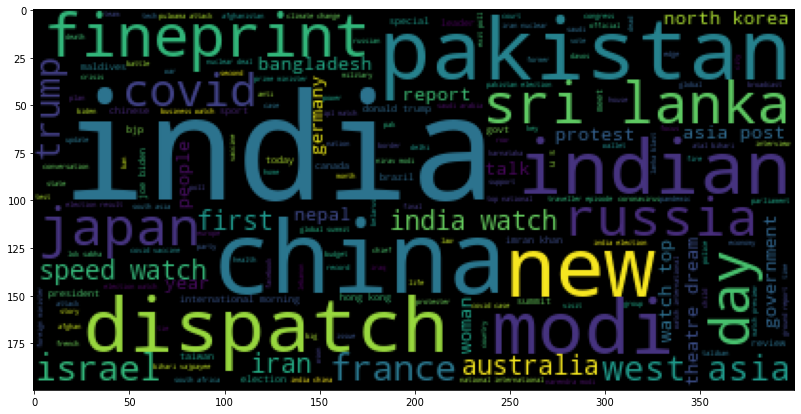

In [41]:
tokenized=[nltk.pos_tag(word_tokenize(i)) for i in dummy_text]
raw_text=[]
for i in tokenized:
    for j in i:
        if (j[1]=='NN') or (j[1]=='NNP') or (j[1]=='NNS') or (j[1]=='NNPS') or (j[1]=='JJ'):
            raw_text.append(j[0])

# Lemmatizing

lem=WordNetLemmatizer()

# cleaning the data for analysis

def cleaned_review(text):
    text_no=text.lower()
    text_no=re.sub(r"[^a-zA-Z]",' ',text_no)
    text_no=re.sub(r"\s+"," ",text_no)
    text_no=lem.lemmatize(text_no)
    if len(text_no)>2:
        return text_no 

    
final=[cleaned_review(i) for i in raw_text if cleaned_review(i) is not None]

# Generating Wordcloud

plt.figure(figsize=(15,7))
a1=WordCloud().generate(' '.join(i for i in final if i.lower() not in ('gravitas','news','exclusive','english','wion','latest','live','reports','world','palki','sharma')))
plt.imshow(a1);

In [ ]:
driver = start_chrome(maximize=True)
go_to(playlist_links[9])

In [ ]:
vdos=driver.find_elements_by_id('contents')
for i in vdos:
    print(i.text.split('\n'))

In [ ]:
scroll_down()

In [ ]:
df.head()

In [ ]:
#driver.maximize_window()
#click('trending')

In [ ]:
driver=set_driver(driver)

In [ ]:
kill_browser()

In [ ]:
driver.quit()

In [ ]:
dic=dict()

In [ ]:
dic['akshay']=list('kumar')

In [ ]:
dic['john']=list('cena')

In [ ]:
dic

In [27]:
driver=start_chrome(maximize=True)

In [28]:
go_to('https://www.youtube.com/playlist?list=PLmWa9ZZLlCjsRTrUcoJl_utpQl1OaSM2f')

In [33]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
time.sleep(3)

In [ ]:
#browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")

In [34]:
len(driver.find_elements_by_id('video-title'))

100